In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
water = pd.read_csv('water.csv')

In [3]:
del water['Unnamed: 0']

In [4]:
water.sort_values(['hardness'], ascending=False)

,location,town,mortality,hardness
25,South,Ipswich,1096,138
34,South,Norwich,1259,133
18,South,East Ham,1318,122
58,South,West Ham,1486,122
37,South,Oxford,1175,107
...,...,...,...,...
45,North,Salford,1987,8
36,North,Oldham,1724,6
40,North,Preston,1696,6
38,South,Plymouth,1486,5


Задание 1 - пункт "Построить точечный график"

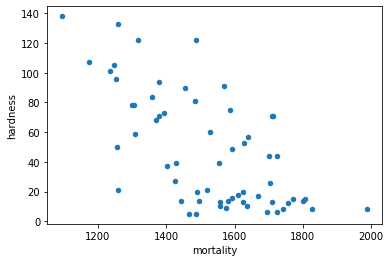

In [5]:
water.plot(kind='scatter', x='mortality',y='hardness') #Судя по графику можно предположить, что связь ОБРАТНАЯ

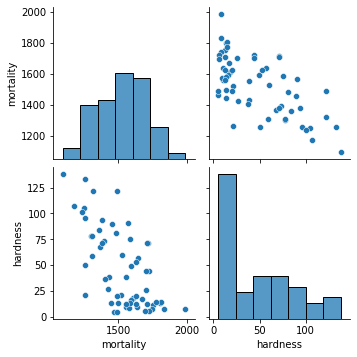

In [6]:
sns.pairplot(water)

Задание 1 - пункт "Рассчитать коэффициенты корреляции Пирсона и Спирмена"

In [7]:
#1

water[['mortality','hardness']].corr() #Пирсон

#Получаем отрицательные значения Коэф. Корреляции и можем заключить, что при увелечении hardness, mortality уменьшается или наоборот
#ПОДСКАЖИТЕ, КАК ТОЧНО ПОНЯТЬ, КАКАЯ ПЕРЕМЕННАЯ ВЛИЯЕТ НА ДРУГУЮ? 

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
water[['mortality','hardness']].corr(method='spearman') #Спирмен

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Задание 1 - пункт "Модель линейной регрессии" 

In [9]:
#2
#ПОДСКАЖИТЕ КАК ПОНЯТЬ/ОПРЕДЕЛИТЬ КАКОЕ ЗНАЧЕНИЕ НУЖНО БРАТЬ В КАЧЕСТВЕ Х И Y ??

X = water[['hardness']] #ПОЧЕМУ ТУТ НУЖНО БРАТЬ ДВОЙНЫЕ СКОБКИ?
y = water['mortality'] #А ТУТ ОДИНАРНЫЕ? 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.shape

(48, 1)

In [12]:
y_train.shape

(48,)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#3
#ЧТО ЗНАЧИТ ОТРИЦАТЕЛЬНОЕ ЗНАЧЕНИЕ???

model.coef_

array([-3.28281845])

In [15]:
model.intercept_

1683.9212680875548

In [ ]:
#Уровенение регресии

hardness = -0.12 * mortality + 239

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1339.22533049, 1651.09308355, 1637.96180974, 1539.47725614,
       1427.86142873, 1618.26489902, 1247.30641379, 1437.70988409,
       1614.98208057, 1664.22435737, 1490.23497934, 1418.01297337,
       1555.89134841])

In [17]:
#4
#Коэфф детерминации - ПОДСКАЖИТЕ ПИЛЗ ПРОСТЫМ ЯЗЫКОМ, ЧТО ЗНАЧИТ ЭТОТ КОЭФФ???

model.score(X_test, y_test)

0.5099679408034544

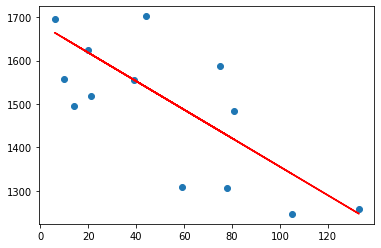

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [20]:
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test
X_test

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hardness,y_pred,y_test
0,105,1339.225330,1247
5,10,1651.093084,1558
46,14,1637.961810,1495
31,44,1539.477256,1702
13,78,1427.861429,1307
55,20,1618.264899,1625
34,133,1247.306414,1259
49,75,1437.709884,1587
12,21,1614.982081,1519
40,6,1664.224357,1696


Задание 1 - пункт "Вывести график остатков"

In [23]:
#5
#Считаем остатки,  ПРИ ЭТО НЕ УВЕРЕН ВЕРНО ЛИ ДЕЛАЮ, ПОГУГЛИЛ И НАШЕЛ ТАКОЙ ВАРИАНТ. ПРОШУ ПЛИЗ ДАТЬ ОБРАТНУЮ СВЯЗЬ КОРРЕКТНО ЛИ?
#И МОЖЕТЕ ЛИ ПОДКИНУТЬ СТАТЕЙКУ КАСАТЕЛЬНО ОСТАТКОВ, ЧТОБЫ БЫЛО БОЛЬШОЕЕ ПОНИМАНИЕИ В ЦЕЛОМ ОБЪЯСНИТЬ АЛГОРИТМ ДЕЙСТВИЙ,ТАК КАК В ЛЕКЦИИ ЭТОГО НЕ БЫЛО( 
residual = y_test - y_pred

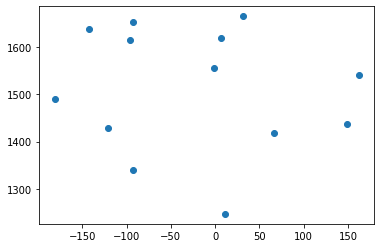

In [24]:
plt.scatter(residual, y_pred)
plt.show()

Задание 3 - "группа North"

In [30]:
north = water[water['location'] == 'North']

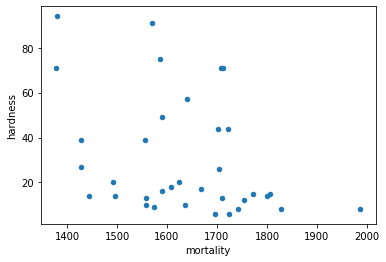

In [29]:
#ТОЧЕЧНЫЙ ГРАФИК
north.plot(kind='scatter', x='mortality',y='hardness') #ТАКЖЕ ПРОСМАТРИВАЕТСЯ ОБРАТНАЯ СВЯЗЬ

In [31]:
#Пирсон
north[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [32]:
#Спирмен
north[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [44]:
#Модель линейной регрессии

X = north[['hardness']]
y = north['mortality']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train.shape

(28, 1)

In [47]:
y_train.shape

(28,)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.coef_

array([-2.25038888])

In [50]:
model.intercept_

1694.905301402942

In [51]:
y_pred = model.predict(X_test)
y_pred

array([1676.90219034, 1674.65180145, 1663.39985704, 1681.4029681 ,
       1658.89907927, 1535.1276907 , 1595.88819055])

In [52]:
#Коэфф детерминации - ПОДСКАЖИТЕ ПИЛЗ ПРОСТЫМ ЯЗЫКОМ, ЧТО ЗНАЧИТ ЭТОТ КОЭФФ???

model.score(X_test, y_test)

-0.18101539518829401

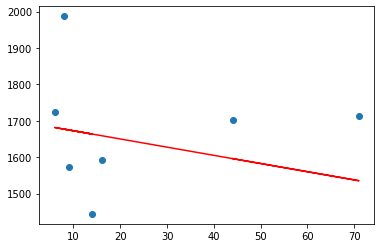

In [53]:
#ПОДСКАЖИТЕ, КАК Я МОГУ ИНТЕРПРЕТИРОВАТЬ ДАННЫЙ ГРАФИК???

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [54]:
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test
X_test

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hardness,y_pred,y_test
45,8,1676.902190,1987
23,9,1674.651801,1574
43,14,1663.399857,1444
36,6,1681.402968,1724
26,16,1658.899079,1591
50,71,1535.127691,1713
31,44,1595.888191,1702


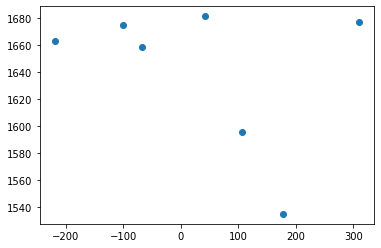

In [55]:
#График остатков

residual = y_test - y_pred
plt.scatter(residual, y_pred)
plt.show()

Задание 3 - "группа South"

In [56]:
south = water[water['location'] == 'South']

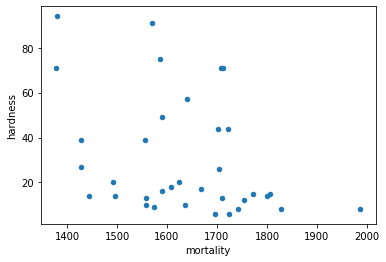

In [59]:
#ТОЧЕЧНЫЙ ГРАФИК
north.plot(kind='scatter', x='mortality',y='hardness') #ТАКЖЕ ПРОСМАТРИВАЕТСЯ ОБРАТНАЯ СВЯЗЬ

In [60]:
#Пирсон
north[['mortality','hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [61]:
#Спирмен
north[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [62]:
#Модель линейной регрессии

X = north[['hardness']]
y = north['mortality']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[-2.25038888]
1694.905301402942


In [66]:
y_pred = model.predict(X_test)
y_pred

array([1676.90219034, 1674.65180145, 1663.39985704, 1681.4029681 ,
       1658.89907927, 1535.1276907 , 1595.88819055])

In [67]:
#Коэфф детерминации - ПОДСКАЖИТЕ ПИЛЗ ПРОСТЫМ ЯЗЫКОМ, ЧТО ЗНАЧИТ ЭТОТ КОЭФФ???

model.score(X_test, y_test)

-0.18101539518829401

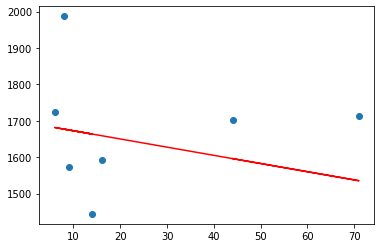

In [68]:
#ПОДСКАЖИТЕ, КАК Я МОГУ ИНТЕРПРЕТИРОВАТЬ ДАННЫЙ ГРАФИК???

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [69]:
X_test['y_pred'] = y_pred
X_test['y_test'] = y_test
X_test

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,hardness,y_pred,y_test
45,8,1676.902190,1987
23,9,1674.651801,1574
43,14,1663.399857,1444
36,6,1681.402968,1724
26,16,1658.899079,1591
50,71,1535.127691,1713
31,44,1595.888191,1702


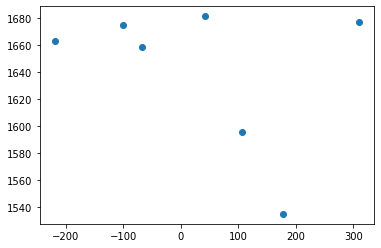

In [70]:
#График остатков

residual = y_test - y_pred
plt.scatter(residual, y_pred)
plt.show()